In [37]:
import matplotlib.pyplot as plt
import torch
import sys, os
sys.path.append(os.path.abspath(".."))
from src.components.positional_encoding import PositionalEncoding

Positional encoding is a technique used in transformer models to give the model some information about the relative position of the words in the sentence. The key idea is that even though the transformer architecture has some benefits like parallelization, it doesn't have any notion of word order which is important in language understanding. Positional encoding addresses this.

It is worth noting that the idea of positional encodings has come under dispute as recent results show that transformer language models still learn positional information natively (Haviv et al., 2022). Some even going as far as suggesting getting rid of positional encoding from certain models entirely (Chi et al., 2023)


References
* Haviv, A., Ram, O., Press, O., Izsak, P., & Levy, O. (2022). Transformer Language Models without Positional Encodings Still Learn Positional Information. arXiv preprint arXiv:2203.16634.
* Chi, T.-C., Fan, T.-H., Chen, L.-W., Rudnicky, A. I., & Ramadge, P. J. (2023). Latent Positional Information is in the Self-Attention Variance of Transformer Language Models Without Positional Embeddings. arXiv preprint arXiv:2305.13571.

In [40]:
batch_size = 2
seq_len = 32
embedding_dim = 248
x = torch.rand(batch_size, seq_len, embedding_dim)

pos_enc = PositionalEncoding(model_dimensions=embedding_dim, dropout=0.1)
output = pos_enc(x)

output.shape

torch.Size([2, 32, 248])

The sinusoidal positioning encoding proposed in the original transformer paper works by generating a unique set of values for each position in an input sequence. It uses both sin and cos functions at different frequencies, alternating between `sin(pos / 10000^(2i/d_model))` and `cos(pos / 10000^(2i/d_model))` based on if the embedding dimension is even or not.

When visualizing the encoding we expect to see a wave-like pattern resulting from the varying sine and cosine values and their periodic nature.

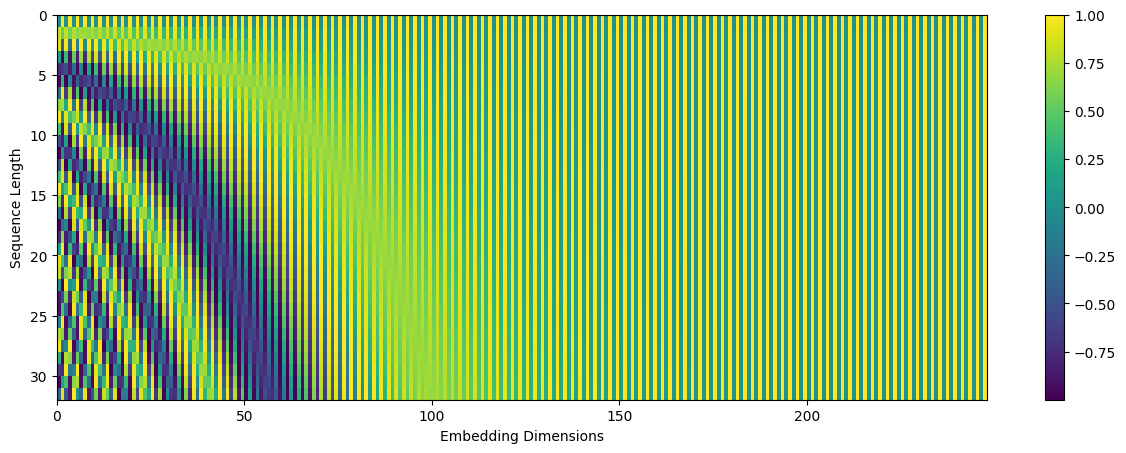

In [39]:
def plot_positional_encoding(pos_enc, seq_len, embedding_dim):
    plt.figure(figsize=(15, 5))
    plt.pcolormesh(pos_enc.pe[0, :seq_len, :], cmap='viridis')
    plt.xlabel('Embedding Dimensions')
    plt.xlim((0, embedding_dim))
    plt.ylim((seq_len, 0))
    plt.ylabel('Sequence Length')
    plt.colorbar()
    plt.show()

plot_positional_encoding(pos_enc, seq_len, embedding_dim)